In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
proposal_path = "/home/shunyin.cheung/amp_memory_GWTC3/run2/GW170818/weights_GW170818_a=128.0_IMRPhenomXPHM_proposal_likelihood.csv"
path_64 = "/home/shunyin.cheung/amp_memory_GWTC3/run2/GW170818/weights_GW170818_a=64.0_IMRPhenomXPHM_target_likelihood.csv"
path_128 = "/home/shunyin.cheung/amp_memory_GWTC3/run2/GW170818/weights_GW170818_a=128.0_IMRPhenomXPHM_target_likelihood.csv"
# path = "/home/shunyin.cheung/amp_memory_GWTC3/run2/GW190630/weights_GW190630_a=2.0_IMRPhenomXPHM_target_likelihood.csv"
# path2 = "/home/shunyin.cheung/amp_memory_GWTC3/run2/GW190630/weights_GW190630_a=128.0_IMRPhenomXPHM_target_likelihood.csv"
proposal_data = np.genfromtxt(proposal_path)
data_64 = np.genfromtxt(path_64)
data_128 = np.genfromtxt(path_128)

[ 0.3636691  -0.45762597 -7.64338767 ...  3.2242649  -8.34951902
 -2.06336165]
log BF 2.431248338058907


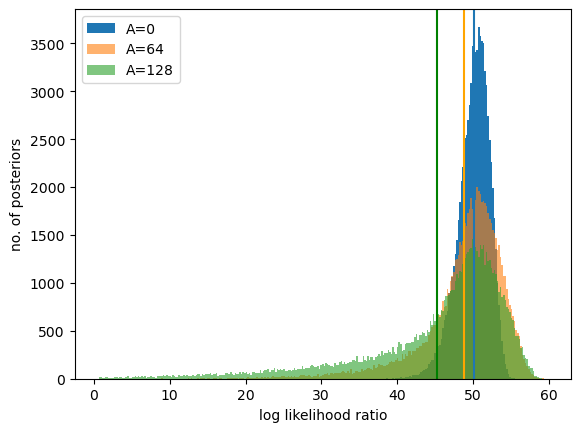

In [10]:
from scipy.special import logsumexp

mean_a0 = proposal_data.mean()
mean_a64 = data_64.mean()
mean_a128 = data_128.mean()

ln_weight = data_128-proposal_data
print(ln_weight)
lnBF = logsumexp(ln_weight)-np.log(len(ln_weight))

print('log BF of A=128', lnBF)

n = int(np.round(np.sqrt(len(proposal_data))))
bins = np.linspace(np.min(data_128), np.max(data_128), n)
plt.figure()
plt.hist(proposal_data, bins = bins,label='A=0')
plt.hist(data_64, bins = bins, alpha=0.6, label='A=64')
plt.hist(data_128, bins = bins, alpha=0.6, label='A=128')
plt.axvline(mean_a0)
plt.axvline(mean_a64, color='orange')
plt.axvline(mean_a128, color='green')
plt.xlabel('log likelihood ratio')
plt.ylabel('no. of posteriors')
plt.legend()
#plt.xlim(100, 120)